--- 1.jpeg ---
예측 결과: Mew → 뮤


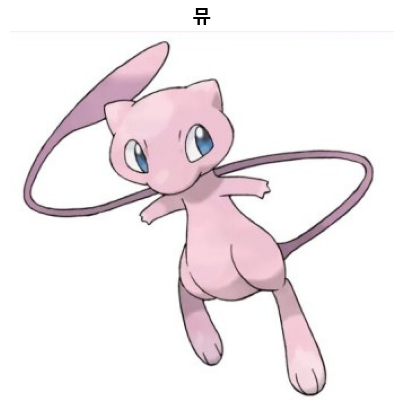

도감 설명:
- 이름: 뮤  
- 타입: 에스퍼  
- 도감 설명:  
  뮤는 신비로운 포켓몬으로, 모든 포켓몬의 DNA를 지니고 있다고 알려져 있다.  
  그래서 모든 포켓몬의 기술을 배울 수 있는 능력을 가지고 있다.

--- 2.jpeg ---
예측 결과: Mew → 뮤


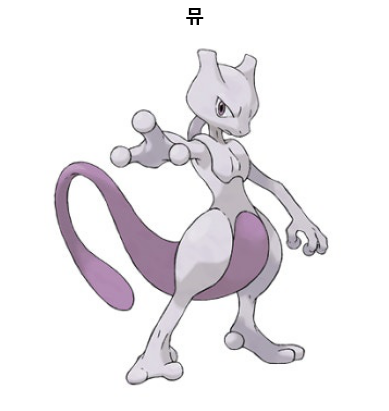

도감 설명:
- 이름: 뮤

- 타입: 에스퍼 타입

- 도감 설명:  
뮤는 전설의 포켓몬으로, 모든 포켓몬의 DNA를 가지고 있다고 전해진다. 신비한 힘을 지닌 이 포켓몬은 투명한 모습으로 변신할 수 있으며, 매우 희귀하다.



In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import requests
from dotenv import load_dotenv
from openai import OpenAI
import matplotlib.pyplot as plt
from PIL import Image


import matplotlib.pyplot as plt
from matplotlib import font_manager,rc
import platform
# 한글 폰트 설정
if platform.system() == 'Windows':# 윈도우인 경우
    font_path = "c:/Windows/Fonts/malgun.ttf" # 맑은 고딕 폰트 경로
    font_name = font_manager.FontProperties(fname=font_path).get_name()
    plt.rc('font', family=font_name)
elif platform.system() == 'Darwin': # macOS인 경우
    plt.rc('font', family='AppleGothic')
else: # Linux 등 다른 OS인 경우
    plt.rc('font', family='NanumGothic')
# 음수 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False


load_dotenv()
client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

# 모델 로드
model = load_model("best_pokemon_model.keras")

# 영어 → 한국어 매핑 (이미 정의한 name_mapping 그대로 사용)
name_mapping = {
    "Bulbasaur": "이상해씨", "Ivysaur": "이상해풀","Venusaur": "이상해꽃","Charmander": "파이리","Charmeleon": "리자드","Charizard": "리자몽",
    "Squirtle": "꼬부기","Wartortle": "어니부기","Blastoise": "거북왕","Caterpie": "캐터피","Metapod": "단데기","Butterfree": "버터플",
    "Weedle": "뿔충이","Kakuna": "딱충이","Beedrill": "독침붕","Pidgey": "구구","Pidgeotto": "피죤","Pidgeot": "피죤투",
    "Rattata": "꼬렛","Raticate": "레트라","Spearow": "깨비참","Fearow": "깨비드릴조","Ekans": "아보","Arbok": "아보크",
    "Pikachu": "피카츄","Raichu": "라이츄","Sandshrew": "모래두지","Sandslash": "고지","Nidoran-f": "니드런♀","Nidorina": "니드리나",
    "Nidoqueen": "니드퀸","Nidoran-m": "니드런♂","Nidorino": "니드리노","Nidoking": "니드킹","Clefairy": "삐삐","Clefable": "픽시",
    "Vulpix": "식스테일","Ninetales": "나인테일","Jigglypuff": "푸린","Wigglytuff": "푸크린","Zubat": "주뱃","Golbat": "골뱃","Oddish": "뚜벅쵸",
    "Gloom": "냄새꼬","Vileplume": "라플레시아","Paras": "파라스","Parasect": "파라섹트","Venonat": "콘팡","Venomoth": "도나리","Diglett": "디그다",
    "Dugtrio": "닥트리오","Meowth": "나옹","Persian": "페르시온","Psyduck": "고라파덕","Golduck": "골덕","Mankey": "망키","Primeape": "성원숭","Growlithe": "가디",
    "Arcanine": "윈디","Poliwag": "발챙이","Poliwhirl": "슈륙챙이","Poliwrath": "강챙이","Abra": "케이시","Kadabra": "윤겔라","Alakazam": "후딘","Machop": "알통몬",
    "Machoke": "근육몬","Machamp": "괴력몬","Bellsprout": "모다피","Weepinbell": "우츠동",
    "Victreebel": "우츠보트","Tentacool": "왕눈해","Tentacruel": "독파리","Geodude": "꼬마돌","Graveler": "데구리","Golem": "딱구리","Ponyta": "포니타",
    "Rapidash": "날쌩마","Slowpoke": "야돈","Slowbro": "야도란",
    "Magnemite": "코일","Magneton": "레어코일","Farfetchd": "파오리","Doduo": "두두","Dodrio": "두트리오","Seel": "쥬쥬","Dewgong": "쥬레곤",
    "Grimer": "질퍽이","Muk": "질뻐기","Shellder": "셀러","Cloyster": "파르셀","Gastly": "고오스","Haunter": "고우스트","Gengar": "팬텀","Onix": "롱스톤",
    "Drowzee": "슬리프","Hypno": "슬리퍼","Krabby": "크랩","Kingler": "킹크랩","Voltorb": "찌리리공","Electrode": "붐볼","Exeggcute": "아라리",
    "Exeggutor": "나시","Cubone": "탕구리","Marowak": "텅구리","Hitmonlee": "시라소몬","Hitmonchan": "홍수몬","Lickitung": "내루미","Koffing": "또가스",
    "Weezing": "또도가스","Rhyhorn": "뿔카노","Rhydon": "코뿌리","Chansey": "럭키","Tangela": "덩쿠리","Kangaskhan": "캥카","Horsea": "쏘드라",
    "Seadra": "시드라","Goldeen": "콘치","Seaking": "왕콘치","Staryu": "별가사리","Starmie": "아쿠스타","Mr.Mime": "마임맨","Scyther": "스라크","Jynx": "루주라",
    "Electabuzz": "에레브","Magmar": "마그마","Pinsir": "쁘사이저","Tauros": "켄타로스","Magikarp": "잉어킹","Gyarados": "갸라도스","Lapras": "라프라스",
    "Ditto": "메타몽","Eevee": "이브이","Vaporeon": "샤미드","Jolteon": "쥬피썬더","Flareon": "부스터","Porygon": "폴리곤","Omanyte": "암나이트",
    "Omastar": "암스타","Kabuto": "투구","Kabutops": "투구푸스","Aerodactyl": "프테라","Snorlax": "잠만보",
    "Articuno": "프리져","Zapdos": "썬더","Moltres": "파이어","Dratini": "미뇽",
    "Dragonair": "신뇽","Dragonite": "망나뇽","Mewtwo": "뮤츠","Mew": "뮤"
}

# class_names (영문 기준)
class_names = ['Abra', 'Aerodactyl', 'Alakazam', 'Arbok', 'Arcanine', 
               'Articuno', 'Beedrill', 'Bellsprout', 'Blastoise', 'Bulbasaur',
               'Butterfree', 'Caterpie', 'Chansey', 'Charizard', 'Charmander', 
               'Charmeleon', 'Clefable', 'Clefairy', 'Cloyster', 'Cubone', 'Dewgong', 
               'Diglett', 'Ditto', 'Dodrio', 'Doduo', 'Dragonair', 'Dragonite', 'Dratini', 
               'Drowzee', 'Dugtrio', 'Eevee', 'Ekans', 'Electabuzz', 'Electrode', 'Exeggcute', 
               'Exeggutor', 'Farfetchd', 'Fearow', 'Flareon', 'Gastly', 'Gengar', 'Geodude', 
               'Gloom', 'Golbat', 'Goldeen', 'Golduck', 'Golem', 'Graveler', 'Grimer', 'Growlithe', 
               'Gyarados', 'Haunter', 'Hitmonchan', 'Hitmonlee', 'Horsea', 'Hypno', 'Ivysaur', 'Jigglypuff', 
               'Jolteon', 'Jynx', 'Kabuto', 'Kabutops', 'Kadabra', 'Kakuna', 'Kangaskhan', 'Kingler', 'Koffing', 
               'Krabby', 'Lapras', 'Lickitung', 'Machamp', 'Machoke', 'Machop', 'Magikarp', 'Magmar', 'Magnemite', 
               'Magneton', 'Mankey', 'Marowak', 'Meowth', 'Metapod', 'Mew', 'Mewtwo', 'Moltres', 'Mr.Mime', 'Muk', 
               'Nidoking', 'Nidoqueen', 'Nidoran-f', 'Nidoran-m', 'Nidorina', 'Nidorino', 'Ninetales', 'Oddish', 'Omanyte', 
               'Omastar', 'Onix', 'Paras', 'Parasect', 'Persian', 'Pidgeot', 'Pidgeotto', 'Pidgey', 'Pikachu', 'Pinsir', 'Poliwag',
               'Poliwhirl', 'Poliwrath', 'Ponyta', 'Porygon', 'Primeape', 'Psyduck', 'Raichu', 'Rapidash', 'Raticate', 'Rattata', 'Rhydon',
               'Rhyhorn', 'Sandshrew', 'Sandslash', 'Scyther', 'Seadra', 'Seaking', 'Seel', 'Shellder', 'Slowbro', 'Slowpoke', 'Snorlax',
               'Spearow', 'Squirtle', 'Starmie', 'Staryu', 'Tangela', 'Tauros', 'Tentacool', 'Tentacruel', 'Vaporeon', 'Venomoth', 
               'Venonat', 'Venusaur', 'Victreebel', 'Vileplume', 'Voltorb', 'Vulpix', 'Wartortle', 'Weedle', 'Weepinbell', 'Weezing', 
               'Wigglytuff', 'Zapdos', 'Zubat']

# 포켓몬 예측
def predict_pokemon(img_path, img_size=(224, 224)):
    img = image.load_img(img_path, target_size=img_size)
    img_array = np.expand_dims(np.array(img) / 255.0, axis=0)
    preds = model.predict(img_array, verbose=0)
    eng_name = class_names[np.argmax(preds[0])]
    kor_name = name_mapping.get(eng_name, eng_name)  # 매핑 없으면 영어 유지
    return eng_name, kor_name

# OpenAI API로 포켓몬 설명 가져오기
def get_pokemon_info(kor_name):
    prompt = f"""
    포켓몬 {kor_name}에 대해 알려줘.
    - 이름
    - 타입
    - 도감 설명 (간단히)
    한국어로 줄바꿈해서 정리해줘.
    다나까로 설명해줘.
    """
    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[{"role": "user", "content": prompt}]
    )
    return response.choices[0].message.content.strip()

# 이미지와 결과 함께 출력
def show_result(img_path, kor_name, info):
    img = Image.open(img_path)
    plt.imshow(img)
    plt.axis("off")
    plt.title(kor_name, fontsize=14, fontweight="bold")
    plt.show()
    print("도감 설명:\n" + info + "\n")

# 실행
test_dir = "./poketmon_test"
for fname in os.listdir(test_dir):
    if fname.lower().endswith((".png", ".jpg", ".jpeg")):
        img_path = os.path.join(test_dir, fname)

        # 1) 모델 예측
        pokemon_name_en, pokemon_name_ko = predict_pokemon(img_path)

        # 2) 설명 가져오기
        info = get_pokemon_info(pokemon_name_ko)

        # 3) 이미지 + 결과 출력
        print(f"--- {fname} ---")
        print(f"예측 결과: {pokemon_name_en} → {pokemon_name_ko}")
        show_result(img_path, pokemon_name_ko, info)